In [1]:
import json
from pprint import pprint
from termcolor import colored
from colored import fg, bg, attr
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# if using a Jupyter notebook, includue:
%matplotlib inline
data_file = "../notebook/predictor_result/predictor_only_enitites.jsonl"
id2name = "../data/id2name.json"

NUMBER_OF_SAMPELS = 100

color = bg('yellow_1') + fg('black')
reset = attr('reset')
blue = "blue"
green = "green"

print()

with open(id2name, 'r') as fp:
    id2name = json.load(fp)

def in_pos(indx, positions):
    for ent_pos in positions:
        if ent_pos[0] <= indx < ent_pos[1]:
            return True

    return False

In [2]:
def change_word_by_entity(entity_str, this_sentence,i,color):
        if list(map(lambda x: x.lower(), this_sentence[i:i + len(entity_str.split(" "))])) == entity_str.split():
            this_sentence = this_sentence[:i] + [colored(w, color, attrs=['bold']) for w in entity_str.split()] + \
                            this_sentence[i + len(entity_str.split(" ")):]
        return this_sentence


In [3]:
preffix = ""
def _show_sentence(head,tail,this_sentence,relation,correct_relation = None, is_prediction = False,prob : str = "",score: str = ""):
    print(preffix + "head:", colored(head, 'blue', attrs=['bold']), "  ,  ", "tail", colored(tail, 'green', attrs=['bold']))          
    this_sentence = this_sentence.split()
    for i, word in enumerate(this_sentence):
            if word.lower() == head.split()[0]:
                this_sentence = change_word_by_entity(head, this_sentence,i,blue)
            if word.lower() == tail.split()[0]:
                this_sentence = change_word_by_entity(tail, this_sentence,i,green)
    color = 'yellow' if correct_relation is None or relation == correct_relation else 'grey'
    if is_prediction: color = "red"
    if len(prob) > 0:
        print(preffix + colored(relation, color,attrs=['bold']) + "\t", " ".join(this_sentence) +" " + colored(prob, "magenta",attrs=['bold'])+"; "+ 
              colored(score, "magenta",attrs=['bold']))
    else:
        print(preffix + colored(relation, color,attrs=['bold']) + "\t", " ".join(this_sentence))

In [4]:
def show_set(data):
    correct_relation = data['correct_relation']
    prediction = data["prediction"]
    query = data['query']
    head = data['query_head']
    tail = data['query_tail']
    probability = data['probability'].replace("'","")[1:-1].split(",")
    scores = data['scores']
    _show_sentence(head,tail,query,correct_relation)
    print()

    for k in range(5):
        this_sentence = data["sentence_" +str(k)]
        head = data['sentence_'+str(k)+'_head']
        tail = data['sentence_'+str(k)+'_tail']
        relation = data['sentence_'+str(k)+'_relation']
        _show_sentence(head,tail,this_sentence,relation,correct_relation,  k == int(prediction),probability[k],
                       "{:.2f}".format(scores[k]))
    print()
    return correct_relation
        

In [5]:
total_wrong = 0
total_correct = 0
result_per_type = {}
correct_scroes = []
wrong_scores = []
wrong_prediction_which_rel = {}
with open(data_file) as f:
    for ex_index,line in enumerate(f,1):
        data = json.loads(line)
        scores = data['scores']
        pred_rel = data['sentence_' + data["prediction"] +'_relation']
        pred_score = scores[int(data["prediction"])]
        the_gold_rel = data['correct_relation']
        if data['answer'] == "wrong":
            total_wrong +=1
            print("wrong example number: ",total_wrong,  "example number: ", ex_index)
            show_set(data)
            print()
            wrong_prediction_which_rel[the_gold_rel] = wrong_prediction_which_rel.get(the_gold_rel,Counter())
            wrong_prediction_which_rel[the_gold_rel].update([pred_rel])
            wrong_scores.append(pred_score)
            result_per_type[the_gold_rel] = result_per_type.get(the_gold_rel,[[],[]])
            result_per_type[the_gold_rel][0].append(data)
            
            
        else:
            result_per_type[the_gold_rel] = result_per_type.get(the_gold_rel,[[],[]])
            result_per_type[the_gold_rel][1].append(data)
            correct_scroes.append(pred_score)
            total_correct +=1





wrong example number:  1 example number:  1
head: european union   ,   tail european economic area
member of	 Being member of european economic area ( EEA ) , Norway implemented the european union directive 2002/24/EC .

head: benoît laffineur   ,   tail swimmer
sport	 benoît laffineur ( born 30 October 1957 ) is a French former swimmer . 0.00; 29.16
head: 2009 general elections   ,   tail 2006
follows	 Wilson was re - elected in the 2003 , 2006 , and 2009 general elections .  0.98; 37.24
head: lord may of oxford   ,   tail royal society
member of	 The inaugural Lord Lewis Prize was awarded to lord may of oxford , former President of the royal society and Chief Scientific Advisor to the UK Government , in 2008 .  0.01; 32.60
head: brunhilda   ,   tail goiswintha
mother	 In 579 , her stepson Hermenegild married her granddaughter Ingund , daughter of goiswintha 's daughter brunhilda by the Frankish king Sigebert I.  0.01; 32.80
head: the autocrats   ,   tail finnish
original language of 

wrong example number:  60 example number:  269
head: das boot   ,   tail world war ii
main subject	 In the movie " das boot " , set during world war ii , the German submarine U-96 stops in Vigo for supplies and torpedoes .

head: chemische berichte   ,   tail chemistry
main subject	 It was one of the oldest scientific journals in chemistry , until it merged with " Recueil des Travaux Chimiques des Pays - Bas " to form " chemische berichte / Recueil " in 1997 . 0.22; 36.11
head: klesie kelly   ,   tail soprano
voice type	 klesie kelly , or klesie kelly - Moog , is an American soprano and voice teacher at the Musikhochschule Köln and for international master classes .  0.00; 28.99
head: ascella   ,   tail sagittarius
constellation	 " ascella " was named after ascella , a star in the constellation sagittarius .  0.10; 35.32
head: 2007   ,   tail 2002
follows	 Although the AKP received significantly more votes in 2007 than in 2002 , the number of parliamentary seats they controlled decreas


wrong example number:  116 example number:  536
head: simpsorama   ,   tail twenty-sixth season
part of	 " simpsorama " is the sixth episode of the twenty - sixth season of the animated television series " The Simpsons " , and the 558th episode of the series overall .

head: natasha collins   ,   tail mark speight
spouse	 Following the death of presenter mark speight 's fiancee natasha collins in January 2008 , repeats of the show and its CBeebies spin - off " SMarteenies " were suspended . 0.59; 35.35
head: bering sea   ,   tail pacific
part of	 Its native habitat is the northern pacific , from the Sea of Japan to the Strait of Tartary and southern Kuril Islands and out into the bering sea .  0.39; 34.93
head: anne eleonore of hesse-darmstadt   ,   tail magdalene of brandenburg
mother	 George married Anne Eleonore of Hesse - Darmstadt , daughter of Louis V , Landgrave of Hesse - Darmstadt and magdalene of brandenburg , in 1617 .  0.02; 32.08
head: newton   ,   tail hindi
original lan

wrong example number:  178 example number:  815
head: tpb afk   ,   tail the pirate bay
main subject	 His latest work is a documentary about the pirate bay called " tpb afk " .

head: elara   ,   tail tityos
child	 tityos was the son of elara ; his father was Zeus . 0.33; 35.07
head: geisa   ,   tail spectroscopy
main subject	 It uses spectroscopy from the regularly updated geisa spectral line data catalog .  0.10; 33.87
head: bradley skeete   ,   tail welterweight
competition class	 bradley skeete ( born 17 October 1987 ) is a British boxer who became British welterweight champion in March 2016 .  0.00; 27.19
head: ladell betts   ,   tail running back
position played on team / speciality	 The Redskins managed to get a late - game drive , but it ended up with running back ladell betts getting taken down at the Giant 's 1-yard line on 4th & Goal .  0.00; 27.03
head: kublai   ,   tail sorghaghtani
mother	 At this critical moment , kublai and his mother , sorghaghtani , manage to calm dow

head: ngc 4993   ,   tail hydra constellation
constellation	 Other people followed up on the rumor , and reported that the public logs of several major telescopes listed priority interruptions in order to observe ngc 4993 , a galaxy away in the hydra constellation .  0.49; 33.49
head: 2010 winter paralympics   ,   tail 2006 winter paralympics
follows	 He was head coach of Australia 's Winter Paralympic team for the 1994 Winter Paralympics , 2006 winter paralympics , 2010 winter paralympics and 2014 Winter Paralympics .  0.44; 33.39


wrong example number:  232 example number:  1028
head: hd 212301   ,   tail octans
constellation	 hd 212301 b is an extrasolar planet located approximately 172 light - years ( 53 parsecs ) away in the constellation of octans , orbiting the star hd 212301 .

head: isaac ii angelos   ,   tail irene angelina
child	 irene angelina , a daughter of isaac ii angelos , married Philip of Swabia , King of the Germans . 0.01; 33.24
head: ngc 450   ,   tail cetus
cons

head: henry iii   ,   tail agnes of poitou
spouse	 Emperor henry iii had promised the ducal throne to the Zähringen scion Berthold , however , upon Henry 's death in 1056 his widow agnes of poitou appointed Rudolf of Rheinfelden Duke of Swabia .  0.01; 30.50


wrong example number:  295 example number:  1271
head: carnie wilson   ,   tail wilson phillips
member of	 His podcast , ' Fascinated ' , launched in January 2014 and has featured interviews with carnie wilson of wilson phillips , Kelle Bryan and James Dreyfus .

head: dick tiger   ,   tail light heavyweight
competition class	 On 26 May 1969 , Benvenuti was outpointed over ten rounds by world light heavyweight champion dick tiger in an over - the - weight , non - title match . 0.00; 30.47
head: battle of britain   ,   tail second world war
main subject	 Recordings of Lidell 's news bulletins have been included in many films set in Britain during the second world war , such as the movie " battle of britain " ( 1969 ) .  0.00; 29.1

wrong example number:  358 example number:  1579
head: dimitrie popescu   ,   tail rower
sport	 dimitrie popescu ( born 10 September 1961 in Straja ) is a retired Romanian rower .

head: 1998 assembly election   ,   tail northern ireland forum
follows	 He was also elected for Lagan Valley at the northern ireland forum election in 1996 ( with Jeffrey Donaldson and David Campbell ) , and narrowly held this seat at the 1998 assembly election . 0.00; 25.28
head: michael cross   ,   tail group captain
military rank	 group captain michael cross OBE RAFR is a British former Chief of Staff of the Air Cadet Organisation .  0.80; 39.60
head: sven ottke   ,   tail super middleweight
competition class	 Arthur was a sparring partner for IBF and WBA super middleweight champion sven ottke , whom was in the preparations of a title defense .  0.20; 38.20
head: monika von habsburg   ,   tail princess regina of saxe-meiningen
mother	 She is the twin sister of monika von habsburg , and daughter of Otto vo

wrong example number:  416 example number:  1855
head: the art of fielding   ,   tail baseball
main subject	 Chad Harbach 's 2011 novel " the art of fielding " also centers on a fictional college baseball shortstop who loses the ability to successfully throw to first base .

head: loimologia   ,   tail great plague of london
main subject	 ( 1629–1688 ) was an English physician , known for his work during the great plague of london and his written account " loimologia " of it . 0.09; 37.76
head: gustav walter   ,   tail tenor
voice type	 The composer conducted , with the tenor gustav walter , a student chorus numbering 300 , and the Court Opera orchestra .  0.00; 30.05
head: gautam govinda   ,   tail hindi-language
original language of film or TV show	 gautam govinda is a 2002 Hindi - language Indian feature film directed by Gautam Verma , starring Mithun Chakraborty , Aditya Pancholi , Rakhi Sawant and Kader Khan .  0.00; 30.91
head: mesolithic   ,   tail stone age
part of	 Various arc

follows	 A large new venue , named tivolivredenburg , replaces both Tivoli and the former muziekcentrum vredenburg .  0.01; 33.94
head: chestnut street bridge   ,   tail dequindre cut
crosses	 By March 1930 , sixteen of the crossings of the dequindre cut were finished , including the chestnut street bridge ; the nearby Antietam Avenue Bridge was completed soon thereafter .  0.98; 38.20


wrong example number:  474 example number:  2075
head: 2011   ,   tail 2010 grand final replay
follows	 Malthouse then coached Collingwood to grand finals in 2002 , 2003 , 2010 and 2011 ; with success in the 2010 grand final replay , leading Collingwood to its first premiership since 1990 .

head: new york   ,   tail saint lawrence river
located in or next to body of water	 It is located in the George C. Boldt Yacht House on the saint lawrence river in Jefferson County , new york . 0.02; 36.47
head: amd   ,   tail ati
follows	 Die shrinks are the key to improving price / performance at semiconductor co

head: caushaud lyons   ,   tail american football
sport	 caushaud lyons ( born January 3 , 1993 ) is an american football defensive end for the Minnesota Vikings of the National Football League ( NFL ) .  0.35; 33.52
head: nature materials   ,   tail materials science
main subject	 " nature materials " is focused on all topics within the combined disciplines of " materials science " and " engineering " .  0.59; 34.04
head: archduke joseph of austria   ,   tail archduke stephen of austria
child	 The County of Holzappel was inherited by his eldest daughter , Hermine who was married to archduke joseph of austria and subsequently to her son archduke stephen of austria .  0.01; 29.30
head: eun ji-won   ,   tail sechs kies
member of	 Together with the company 's artists , Park and Eun Ji - won of sechs kies joined and performed in the festival .  0.05; 31.52


wrong example number:  527 example number:  2298
head: nightcrawler   ,   tail mystique
mother	 To find Destiny , nightcrawler teams 

head: john   ,   tail tennis
sport	 In addition to her brother Jeff , Austin 's brothers Doug and john were also professional tennis players .  0.00; 31.92
head: northampton crossing   ,   tail connecticut river
crosses	 The design of the bridge was based on that of the northampton crossing of the connecticut river by the same railroad .  0.78; 38.52
head: owen beck   ,   tail heavyweight
competition class	 He defeated former heavyweight world title challenger owen beck in his only professional bout .  0.00; 29.49


wrong example number:  590 example number:  2661
head: football association of albania   ,   tail uefa
member of	 In November 2003 , to celebrate uefa 's Jubilee , he was selected as the Golden Player of Albania by the football association of albania as their most outstanding player of the past 50 years .

head: john sykes   ,   tail thin lizzy
member of	 After john sykes ' departure from the group in 2009 , guitarist Scott Gorham created another line - up of thin lizzy . 0

head: over and over   ,   tail catch us if you can
follows	 Apart from " catch us if you can " , other million sellers were " Glad All Over " , " Bits and Pieces " and " over and over . "  0.00; 31.60
head: margaret   ,   tail queen elizabeth
mother	 His wife , queen elizabeth , and daughters , Princesses Elizabeth and margaret , were also present for the ceremony . Royal Tour 1947 , British Pathé .  0.97; 42.51


wrong example number:  653 example number:  2942
head: brian kelly   ,   tail cornerback
position played on team / speciality	 Wynn was signed by the Detroit Lions on December 9 , 2008 after the team waived cornerback brian kelly .

head: bill cartwright   ,   tail center
position played on team / speciality	 With the drafting and development of Horace Grant , the Bulls traded Oakley to the New York Knicks for 7'1 " center bill cartwright . 0.08; 34.83
head: the grand final loss   ,   tail 2009 season
part of	 Koschitzke kicked a career - best 48 goals during the 2009 season 

military rank	 he cheng ( ) ( November 1901 – November 8 , 1992 ) birth name He Zonglin ( ) , was a People 's Liberation Army lieutenant general .  0.04; 31.96
head: slash   ,   tail velvet revolver
member of	 Prior to the formation of velvet revolver , Watson was asked by slash ( former guitarist of Guns N ' Roses and currently in velvet revolver ) whether he would be their singer .  0.06; 32.31
head: bill quinlan   ,   tail defensive end
position played on team / speciality	 In April , Lombardi traded Howton to the Cleveland Browns in exchange for defensive end bill quinlan and halfback Lew Carpenter .  0.02; 31.05


wrong example number:  711 example number:  3277
head: right footed   ,   tail jessica cox
main subject	 right footed is a documentary about jessica cox directed by Nick T. Spark and produced by Nick T. Spark and Mona Lisa Yuchengco . right footed official website .

head: ngc 435   ,   tail cetus
constellation	 ngc 435 is a spiral galaxy of type SAB(s)d : located in the

original language of film or TV show	 Malmros ' " barbara " ( 1997 ) is an adaptation of the classic danish novel by Jørgen - Frantz Jacobsen set in the Faroe Islands .  0.00; 27.24
head: serrata del maggior consiglio   ,   tail great council of venice
main subject	 Doge Gradenigo was responsible for the so - called " serrata del maggior consiglio " , the Locking of the great council of venice .  0.08; 32.31
head: brandan schieppati   ,   tail bleeding through
member of	 Mick took a part of Die Die My Darling with fellow Eighteen Visions member Ken Floyd , bleeding through 's brandan schieppati and ex - Burn It Down member , Ryan Downey .  0.38; 33.88
head: craig kelly   ,   tail snowboarders
sport	 The original Mount Baker Hard Core ( MBHC ) consisted of craig kelly , Jeff Fulton and Dan Donnelly , whom were a tight squad of snowboarders coming from Mt.  0.53; 34.22


wrong example number:  769 example number:  3546
head: 3rd canadian division   ,   tail canadian army
part of	 The Bat

head: satsuki igarashi   ,   tail clamp
member of	 clamp is an all - female manga artist group made up of writer Nanase Ohkawa and artists Mokona , Tsubaki Nekoi , and satsuki igarashi . 0.00; 34.76
head: lee haskins   ,   tail super flyweight
competition class	 Booth had been meant to fight lee haskins for the British super flyweight title before Haskins pulled out with a hand injury .  0.00; 30.65
head: like toy soldiers   ,   tail encore
part of	 " like toy soldiers " is a song by American rapper Eminem , from his fifth album " encore " ( 2004 ) .  0.00; 29.75
head: nabal   ,   tail abigail
spouse	 Among Menescardi 's paintings are " Martyrdom of Brothers Maccabe " and " abigail placates David 's designs against her husband nabal " .  0.62; 40.49
head: puan maharani   ,   tail megawati soekarnoputri
mother	 The former President of Indonesia , megawati soekarnoputri also attended , along with her daughter , puan maharani , who is the Coordinating Minister for Human Development and Cu

head: alfredo kraus   ,   tail tenor
voice type	 Kraus , daughter of Spanish tenor alfredo kraus , was born in Milan , where her father was based at the time . 0.00; 25.66
head: grigori panteleimonov   ,   tail sport shooter
sport	 grigori panteleimonov ( , 17 December 1883 , Balta , Ukraine – 21 October 1934 ) was a Russian sport shooter who competed in the 1912 Summer Olympics .  0.00; 28.54
head: gabon   ,   tail united nations
member of	 A career diplomat , Issoze - Ngondet was gabon 's Permanent Representative to the united nations from August 2008 to January 2009 .  0.00; 31.68
head: adobogiona   ,   tail brogitarus
spouse	 adobogiona and brogitarus were the parents of Amyntas , Tetrarch of the Trocmi and King of Galatia .  0.01; 33.14
head: edgware   ,   tail london underground
part of	 The station was the second of three planned by london underground in 1935 for an extension of the Northern line from edgware to Bushey Heath .  0.99; 38.11


wrong example number:  885 example nu

head: kushti   ,   tail hindi
original language of film or TV show	 2010 hindi movie " kushti " was inspired by this movie .  0.01; 32.74
head: the original game   ,   tail wwii
main subject	 " wwii " is the first title since the original game and " " not to feature health regeneration in the campaign .  0.00; 27.58
head: ugc 477   ,   tail pisces
constellation	 ugc 477 is a low surface brightness ( LSB ) galaxy , located in the pisces constellation .  0.99; 37.96
head: natalia vladimirovna guseva   ,   tail biathlete
sport	 natalia vladimirovna guseva née Sorokina (; born 12 September 1982 in Tikhvin , Russian SFSR ) is a Russian female biathlete who lives in Saint Petersburg .  0.00; 29.23


wrong example number:  948 example number:  4309
head: vajiralongkorn   ,   tail bajrakitiyabha
child	 This made Sirindhorn second - in - line to the throne ( after vajiralongkorn ) until the birth of Princess bajrakitiyabha in 1978 .

head: fifteenth season   ,   tail family guy
part of	 " Booki

head: grace memorial bridge   ,   tail cooper river
crosses	 Spanning Town Creek and the cooper river and crossing the uninhabited Drum Island , the two - lane grace memorial bridge was opened as a toll bridge .  0.71; 38.82
head: ngc 382   ,   tail pisces
constellation	 ngc 382 is an elliptical galaxy located in pisces constellation discovered by William Parsons 4 November 1850 .  0.01; 34.27
head: emmanuel lucero   ,   tail super featherweight
competition class	 emmanuel lucero born November 3 , 1978 in Mexico City , Distrito Federal , Mexico ) is a current Mexican professional super featherweight boxer .  0.00; 26.43


wrong example number:  1011 example number:  4623
head: william of conches   ,   tail school of chartres
member of	 He belonged to the school of chartres , of william of conches and Bernard Silvestris .

head: sun horse, moon horse   ,   tail ancient celtic times
main subject	 Rosemary Sutcliff 's 1977 historical novel " Sun Horse , Moon Horse " takes place in the Val

head: eucleia   ,   tail aglaea
mother	 According to the Orphic rhapsody fragments , eucleia 's parents were Hephaestus and aglaea .  0.79; 37.66
head: derek jeter   ,   tail shortstop
position played on team / speciality	 After a public chastising of Yankees shortstop derek jeter for " partying too much " , the two appeared in a Visa commercial club - hopping .  0.00; 32.54


wrong example number:  1074 example number:  4901
head: belize barrier reef   ,   tail caribbean sea
located in or next to body of water	 They were later also found in the Florida Keys in the Gulf of Mexico , and at the belize barrier reef in the caribbean sea .

head: garratt road bridge   ,   tail swan river
crosses	 Before European colonisation , the area around the garratt road bridge site was inhabited by the Mooro people to the north of the swan river , and the Beeloo people to the south . 0.78; 44.79
head: andy holligan   ,   tail light welterweight
competition class	 andy holligan ( 27 - 3 - 0 ) is the fo

head: battle of arnhem   ,   tail operation market garden
part of	 In September 1944 , 1 ALR took part in operation market garden , the battle of arnhem .  0.03; 32.95


wrong example number:  1137 example number:  5139
head: jane wilde   ,   tail oscar wilde
child	 In London , she had the opportunity through jane wilde to meet oscar wilde , her son .

head: sweyn forkbeard   ,   tail canute
child	 Towards the end of July 1013 , the Dane sweyn forkbeard , together with his son and heir canute , arrived in Gainsborough with an army of conquest . 0.15; 37.48
head: ivan kusnjer   ,   tail baritone
voice type	 ivan kusnjer ( born 1951 ) is a Czech baritone professional singer .  0.00; 32.80
head: los angeles angels   ,   tail baseball
sport	 Vance Philip Albitz ( born January 31 , 1988 ) is an American professional baseball player who was an infielder for the St. Louis Cardinals and los angeles angels for five seasons .  0.00; 29.09
head: dowager duchess of devonshire   ,   tail 11th duke


wrong example number:  1198 example number:  5475
head: ngc 288   ,   tail sculptor
constellation	 ngc 288 is a globular cluster in the constellation sculptor .

head: agostino rovere   ,   tail bass
voice type	 agostino rovere ( 1804 , Monza - 1865 , New York City ) was an Italian operatic bass . 0.00; 29.28
head: michal zeman   ,   tail defender
position played on team / speciality	 michal zeman ( born 18 August 1984 ) is a Czech football defender currently playing for FK Ústí nad Labem .  0.86; 36.70
head: kevin   ,   tail middleweight
competition class	 His younger brother kevin also boxed professionally , winning the British and European middleweight titles , and fighting such opponents as Marvin Hagler and Alan Minter .  0.04; 33.57
head: striker   ,   tail hindi
original language of film or TV show	 His second hindi film , " striker " ( 2010 ) , was a period drama set in the 1990s portraying the life of a carrom player .  0.00; 31.20
head: ngc 62   ,   tail cetus
constellation	 

head: khabarovsk bridge   ,   tail amur river
crosses	 khabarovsk bridge was originally built in 1916 as a single - track structure that carried the Trans - Siberian Railway line across the amur river near the city of Khabarovsk , Russia .  0.16; 33.87
head: mary ann magnin   ,   tail isaac magnin
spouse	 Joseph Magnin was the son of isaac magnin and mary ann magnin .  0.00; 27.86
head: double sculls   ,   tail single sculls
follows	 She finished 6th in the single sculls at the 1996 Summer Olympics and 4th in the double sculls at the 2000 Summer Olympics .  0.73; 35.38


wrong example number:  1253 example number:  5785
head: jake goebbert   ,   tail outfielder
position played on team / speciality	 On 4 April 2013 , the Oakland Athletics traded Blackley to the Houston Astros for outfielder jake goebbert .

head: 1993   ,   tail 1992
follows	 The Broncos maintained their 100 % win record in Grand Finals ( 1992 , 1993 , 1997 , 1998 , 2000 and 2006 ) . 0.00; 27.75
head: luís fabiano   ,  

head: christian iii of denmark   ,   tail anna
child	 Elisabeth was a daughter of the Elector August of Saxony ( 1526–1586 ) from his marriage to anna ( 1532–1585 ) , daughter King of the christian iii of denmark .  0.00; 32.53
head: ngc 520   ,   tail pisces
constellation	 ngc 520 are a pair of colliding spiral galaxies about 90 million light - years away in the constellation pisces and were discovered by astronomer William Herschel on 13 December 1784 .  0.16; 37.78


wrong example number:  1316 example number:  6094
head: ernst hinterseer   ,   tail hansi
child	 His sons Ernst , Georg , and hansi also became ski racers , while his grandson Lukas Hinterseer played football for the Austrian national team . ernst hinterseer .

head: ni zhiliang   ,   tail lieutenant general
military rank	 ni zhiliang ( ) ( October 1900 – December 15 , 1965 ) was a People 's Republic of China diplomat and People 's Liberation Army lieutenant general . 0.45; 31.02
head: stephen of blois   ,   tail adela 

head: olympic 5000 metres final   ,   tail 2016 rio olympics
part of	 At the 2016 rio olympics he was one of three Kenyans , alongside Caleb Ndiku and Isiah Koech , who failed to progress to the olympic 5000 metres final .  0.00; 28.49


wrong example number:  1379 example number:  6365
head: full circle   ,   tail meglos
follows	 It featured music , by Peter Howell and Paddy Kingsland , for the 1980 " Doctor Who " serials " meglos " and " full circle " .

head: pinklon thomas   ,   tail heavyweight
competition class	 He won the WBC heavyweight title in 1986 by defeating pinklon thomas , but lost it in his first defence later that year to Mike Tyson , who was then undefeated at 20 years old . 0.00; 32.14
head: july   ,   tail june
follows	 Fasli year means period of 12 months from july to june .  0.04; 36.10
head: mar del plata sevens   ,   tail rugby sevens
sport	 The 2000 mar del plata sevens was a rugby sevens tournament held in Argentina as the fourth stop of the 1999–2000 World Se

wrong example number:  1450 example number:  6770
head: kalvakuntla chandrashekhar rao   ,   tail kalvakuntla kavitha
child	 kalvakuntla kavitha was born at Siddipet on March 13 , 1978 to kalvakuntla chandrashekhar rao and Shobha .

head: henry iii   ,   tail agnes of poitou
spouse	 Emperor henry iii had promised the ducal throne to the Zähringen scion Berthold , however , upon Henry 's death in 1056 his widow agnes of poitou appointed Rudolf of Rheinfelden Duke of Swabia . 0.53; 37.68
head: new martinsville bridge   ,   tail ohio river
crosses	 SR 536 begins unsigned at the West Virginia state line on the new martinsville bridge while crossing over the ohio river .  0.00; 32.45
head: coronados island   ,   tail gulf of california
located in or next to body of water	 It is known only from coronados island , a small island in the gulf of california , part of Baja California Sur , Mexico .  0.00; 32.75
head: salvatore sirigu   ,   tail goalkeeper
position played on team / speciality	 Bef

head: emperor xuanwu   ,   tail emperor xiaoming
child	 He held increasingly higher offices during the reigns of emperor xuanwu and his son and successor emperor xiaoming .  0.66; 40.96
head: jung hana   ,   tail secret
member of	 Hyoseong , along with Han Sunhwa , Song Jieun and jung hana , debuted as the group , secret .  0.00; 34.05


wrong example number:  1516 example number:  7090
head: first season   ,   tail glee
part of	 During the first season of " glee " , the show paid tribute to Madonna with the episode " The Power of Madonna " .

head: charles vii of france   ,   tail marie of anjou
spouse	 She was a daughter of King charles vii of france , " The Victorious , " and marie of anjou . 0.00; 28.29
head: fortieth   ,   tail thirty-ninth
follows	 Buckland was elected as a Republican to the Thirty - ninth and fortieth Congresses ( March 4 , 1865 – March 4 , 1869 ) .  0.61; 35.90
head: rectum   ,   tail large intestine
part of	 Ulcerative colitis and familial adenomatous polyposi

head: deewaar   ,   tail hindi
original language of film or TV show	 The film had musical score by Raghu Kumar . It is a remake of 1975 hindi film " deewaar " .  0.00; 29.85
head: nobody knows me   ,   tail hollywood
follows	 Two machines were used for the vocal editing in songs like " hollywood " and " nobody knows me " .  0.01; 32.47
head: yolanda   ,   tail coretta scott king
mother	 It is also the birthplace of Dr. Martin Luther King Jr. and coretta scott king 's two eldest children , yolanda and Martin Luther III .  0.99; 37.34
head: otis taylor   ,   tail wide receiver
position played on team / speciality	 In 2006 , Gonzalez broke wide receiver otis taylor 's Chiefs team receiving yards and touchdowns mark , and also passed running back Priest Holmes for the team yards from scrimmage record .  0.00; 28.62


wrong example number:  1590 example number:  7457
head: joseph de combe   ,   tail swimmer
sport	 Skelton finished in 2:56.6 , decisively defeating Belgian swimmer joseph de c

head: mycelium running   ,   tail mycoremediation
main subject	 In " mycelium running " ( Ten Speed Press 2005 ) , Stamets explores the use and applications of fungi in bioremediation — a practice called mycoremediation .

head: slovakia   ,   tail european union
member of	 In the european union , support tends to be the lowest in Bulgaria , Latvia , Poland , Romania , slovakia , and Lithuania . 0.01; 29.34
head: hip 57274   ,   tail ursa major
constellation	 hip 57274 is a star in the constellation ursa major .  0.81; 33.77
head: paula wessely   ,   tail attila hörbiger
spouse	 Her grandfather was Paul Hörbiger , his brother attila hörbiger was married to paula wessely .  0.17; 32.19
head: great macarthy   ,   tail australian rules football
main subject	 The great macarthy is a 1975 comedy about australian rules football .  0.01; 29.71
head: tomáš rachůnek   ,   tail ice hockey
sport	 Marie Greyhounds in the Ontario Hockey League . tomáš rachůnek profile He is the younger brother of I

wrong example number:  1731 example number:  8063
head: sahra rural district   ,   tail bardaskan county
part of	 Sharifabad ( , also Romanized as Sharīfābād ) is a village in sahra rural district , Anabad District , bardaskan county , Razavi Khorasan Province , Iran .

head: frederick bowhill   ,   tail air chief marshal
military rank	 216 Group also became a sub - command of the newly created Transport Command , an umbrella organization of all British transport units worldwide under the command of air chief marshal Sir frederick bowhill . 0.00; 24.09
head: john corvinus   ,   tail barbara edelpöck
mother	 Matthias 's only surviving offspring was an illegitimate son , john corvinus , by his mistress barbara edelpöck .  0.00; 27.48
head: jomard islands   ,   tail solomon sea
located in or next to body of water	 The channel lies between the jomard islands and Duperré Islets / Bramble Haven and connects the solomon sea with the Coral Sea .  1.00; 36.98
head: baltic fleet   ,   tail russi

head: elisabeth of austria   ,   tail elisabeth of bohemia
mother	 In 1454 , he married elisabeth of austria , daughter of the late King of the Romans Albert II of Habsburg by his late wife elisabeth of bohemia .  0.00; 27.21
head: île saint-paul   ,   tail indian ocean
located in or next to body of water	 The geographic coordinates of Firstview are roughly the antipodes of the coordinates of Île Saint - Paul , a French island in the indian ocean .  0.98; 35.49
head: king william ii   ,   tail charlotte
spouse	 Among the visitors were Württemberg ’s king william ii and his wife charlotte .  0.00; 29.04


wrong example number:  1798 example number:  8355
head: dame maggie smith   ,   tail toby stephens
child	 Plowman married actor toby stephens , who is the son of actors dame maggie smith and the late Sir Robert Stephens , in London , in 2001 .

head: hōjō ujiyasu   ,   tail uesugi kagetora
child	 Katsuyori incurred the wrath of the Hōjō family by helping Uesugi Kagekatsu against uesugi

wrong example number:  1863 example number:  8651
head: sexy dancer   ,   tail self-titled
part of	 " sexy dancer " was the follow - up single to Prince 's self - titled second album in the UK .

head: don perkins   ,   tail fullback
position played on team / speciality	 His performance helped the Cowboys take some of the running load from fullback don perkins and reach its first championship game . 0.06; 29.31
head: so11   ,   tail scotland yard
part of	 In March 2000 , as a Detective Superintendent , she was appointed head of the informant unit in the Criminal Intelligence Branch ( so11 ) at scotland yard .  0.04; 28.85
head: palm beach county   ,   tail lake okeechobee
located in or next to body of water	 Kreamer Island is a small island in the south - easternmost part of lake okeechobee , located in palm beach county , Florida just north of Torry Island .  0.37; 31.10
head: elizabeth de vermandois   ,   tail william de warenne, 2nd earl of surrey
spouse	 He married 1130 Gundred de 

wrong example number:  1936 example number:  9023
head: into the storm   ,   tail world war ii
main subject	 Hamilton won her first professional role in HBO ’s world war ii film " into the storm " , produced by Ridley Scott , upon graduating drama school .

head: ahmose   ,   tail hatshepsut
child	 hatshepsut ’s royal lineage was established through her parents , Thutmose I her father and The Great Royal Wife ahmose , her mother . 0.00; 30.35
head: referendum   ,   tail catalan independence
main subject	 In June 2017 President of Catalonia Carles Puigdemont announced that a referendum on catalan independence would be held on 1 October 2017 .  0.05; 35.26
head: bujumbura   ,   tail lake tanganyika
located in or next to body of water	 Kalemie Port is also used by boat services to the northern lake tanganyika ports of Kalundu - Uvira and bujumbura in Burundi , and southwards to Moba and Mpulungu in Zambia .  0.03; 34.80
head: royal canadian air force   ,   tail canadian forces
part of	 NO

head: tsunoshima   ,   tail sea of japan
located in or next to body of water	 The holotype is an adult female , NSMT - M32505 ( National Science Museum , Tokyo ) , which stranded at tsunoshima ( ) in the southern sea of japan on 11 September 1998 .  0.70; 37.98


wrong example number:  2000 example number:  9341
head: gold on the ceiling   ,   tail el camino
part of	 " gold on the ceiling " is the third track from " el camino " , the seventh studio album by American rock band The Black Keys .

head: rougon-macquart   ,   tail second french empire
main subject	 Zola 's plan for the Rougon - Macquart novels was to show how heredity and environment worked on a family over the course of the second french empire . 0.00; 31.34
head: january 1910   ,   tail 1906
follows	 The seat had been represented by the Conservatives since january 1910 but it had elected Liberals in 1880 and 1906 .  0.98; 38.95
head: samuel mcclellan   ,   tail brigadier general
military rank	 samuel mcclellan ( 4 January

head: richard strongbow   ,   tail isabel de clare, 4th countess of pembroke
child	 King of England Richard I arranged for William Marshal , 1st Earl of Pembroke to marry the 17-year - old daughter of richard strongbow Isabel de Clare , 4th Countess of Pembroke in 1189 .  0.51; 36.50
head: götz george   ,   tail berta drews
mother	 götz george (; 23 July 1938 – 19 June 2016 ) was a German actor , son of actor couple berta drews and Heinrich George .  0.45; 36.37
head: the first basket   ,   tail basketball
main subject	 Auerbach is prominently featured in the documentary film , " the first basket " , about Jewish basketball history .  0.01; 32.63


wrong example number:  2074 example number:  9693
head: belarus   ,   tail interpol
member of	 According to them , countries that frequently abuse the interpol system include : China , Russia , Iran , Turkey , Kazakhstan , belarus , Tunisia .

head: alen petrović   ,   tail football defender
position played on team / speciality	 alen petrovi

In [7]:
print(total_wrong/(total_correct+total_wrong))
print((total_correct+total_wrong))

0.2138
10000


In [16]:
for k,v in result_per_type.items():
    print("acc for ", k)
#     print("total from this category:",(len(v[0])+len(v[1])))
    print(len(v[1])/ (len(v[0])+len(v[1]) ))

acc for  member of
0.48534201954397393
acc for  crosses
0.9668674698795181
acc for  part of
0.41050903119868637
acc for  mother
0.6572379367720466
acc for  child
0.655448717948718
acc for  main subject
0.5924657534246576
acc for  military rank
0.9670846394984326
acc for  located in or next to body of water
0.797583081570997
acc for  voice type
1.0
acc for  follows
0.75625
acc for  original language of film or TV show
0.9336650082918739
acc for  position played on team / speciality
0.9626016260162602
acc for  spouse
0.7122641509433962
acc for  competition class
0.9730134932533733
acc for  constellation
0.8153364632237872
acc for  sport
0.8473413379073756


In [18]:
# check similarity between relations on train and dev
wrong_scores = np.array(wrong_scores)
correct_scroes = np.array(correct_scroes)


In [19]:
wrong_scores.mean()


37.723232936591494

In [20]:
correct_scroes.mean()


42.823280920602684

In [21]:
wrong_scores.std()


3.2567313720316005

In [22]:
correct_scroes.std()


4.907898756197537

In [23]:
np.max(wrong_scores)


61.34579086303711

(array([ 40., 369., 784., 697., 202.,  41.,   3.,   0.,   1.,   1.]),
 array([28.21909904, 31.53176823, 34.84443741, 38.15710659, 41.46977577,
        44.78244495, 48.09511414, 51.40778332, 54.7204525 , 58.03312168,
        61.34579086]),
 <a list of 10 Patch objects>)

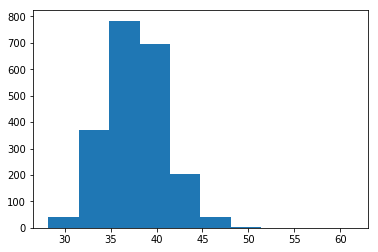

In [24]:
plt.hist(wrong_scores)



(array([0.00175097, 0.01659774, 0.05147125, 0.07368669, 0.07857482,
        0.04081951, 0.01747323, 0.00339251, 0.00280885, 0.00021887]),
 array([28.74953842, 32.23635635, 35.72317429, 39.20999222, 42.69681015,
        46.18362808, 49.67044601, 53.15726395, 56.64408188, 60.13089981,
        63.61771774]),
 <a list of 10 Patch objects>)

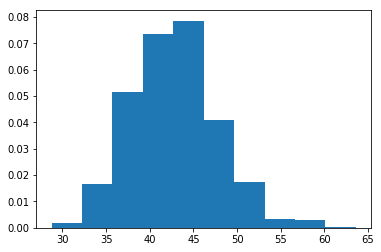

In [25]:
plt.hist(correct_scroes,density=True)

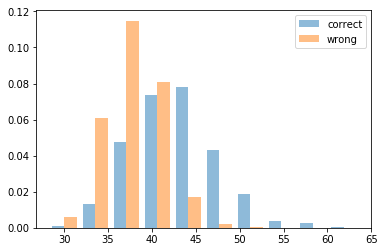

In [26]:
bins = [35,45,55,60,65,70]
plt.hist([correct_scroes,wrong_scores], 10, alpha=0.5, label=['correct','wrong'],density=True)
# plt.hist(wrong_scores, 10, alpha=0.5, label='wrong')
plt.legend(loc='upper right')
# plt.show()

In [28]:
# check unigrams intersection with other relations, both on tokens and entities
# on train as well
for d in result_per_type['voice type'][1]:
    show_set(d)
    print()
    

head: josef metternich   ,   tail baritone
voice type	 Thereupon followed a move to Feldafing on Lake Starnberg , where Dryden spent the better part of two years working with the German baritone josef metternich .

head: virginia macwatters   ,   tail soprano
voice type	 virginia macwatters ( June 19 , 1912 – November 5 , 2005 ) was an American coloratura soprano . 1.00; 45.53
head: lady shi   ,   tail yang xingmi
spouse	 His mother was yang xingmi 's concubine lady shi , who was also the mother of his older brother Yang Wo .  0.00; 28.45
head: nutrition books   ,   tail vegan
main subject	 A vegan , Silverstone has endorsed PETA activities and has published two nutrition books .  0.00; 29.99
head: gentleman   ,   tail gangnam style
follows	 The music video was shot in a style to Psy 's singles " gangnam style " and " gentleman " .  0.00; 30.11
head: malcolm orme little   ,   tail brigadier-general
military rank	 Brigadier - General malcolm orme little , ( 29 November 1857 – 1 February

mother	 Initially , Northern Zhou continued to detain Chen Xu 's wife liu jingyan and son chen shubao , but after further negotiations , Northern Zhou released them as well .  0.00; 31.05


head: badri maisuradze   ,   tail tenor
voice type	 badri maisuradze ( ) ( born on November 13 , 1966 ) is a Georgian tenor opera singer , a leading dramatic tenor of the Bolshoi Theatre in Moscow , Russia .

head: constance   ,   tail alice
mother	 In the winter of 1135–36 , Ralph supported the regency of constance 's mother , alice . 0.00; 29.50
head: saving private ryan   ,   tail world war ii
main subject	 In the film " saving private ryan " , cinematographer Janusz Kamiński used such a shutter adjustment to give his film the look of world war ii newsreel photography .  0.00; 26.75
head: vijay kaaviya neram   ,   tail tamil dubbed
original language of film or TV show	 vijay kaaviya neram ( ) is a tamil dubbed soap opera that aired on STAR Vijay .  0.00; 28.66
head: george zervanos   ,   tail ten


head: valdemar christian   ,   tail kirstine munk
mother	 The king ’s plans for his new castle were that the house should become the home for his son valdemar christian , who was born to him by kirstine munk . 0.00; 30.54
head: 2015   ,   tail 2011
follows	 Colombia ( 2000 , 2011 , 2015 ) are the current cup holders .  0.00; 28.05
head: željko lučić   ,   tail baritone
voice type	 željko lučić ( born 24 February 1968 ) is a Serbian operatic baritone who has had an active international career since 1993 .  1.00; 45.06
head: césar taborda   ,   tail goalkeeper
position played on team / speciality	 césar taborda ( born January 23 , 1984 ) is an Argentine football goalkeeper who plays for Central Córdoba de Santiago del Estero .  0.00; 36.11
head: fritzie zivic   ,   tail welterweight
competition class	 He then fought a memorable non - title fight against welterweight champion fritzie zivic on November 15 .  0.00; 36.46


head: sharon coste   ,   tail soprano
voice type	 sharon coste ( bo

head: trude eipperle   ,   tail soprano
voice type	 trude eipperle ( 27 January 1908 – 18 October 1997 ) was a German operatic soprano .  1.00; 44.44
head: denys cochin   ,   tail augustin cochin
child	 He was the father of the Catholic politician denys cochin and the grandfather of the historian augustin cochin .  0.00; 27.09
head: agni ips   ,   tail kannada
original language of film or TV show	 In kannada films , her notable supporting performances included her roles in " Anuraga Sangama " ( 1995 ) and " agni ips " ( 1997 ) .  0.00; 27.57
head: aşkkolik   ,   tail deli oğlan
follows	 These included " My Body " , " Do n't ask " , " deli oğlan " and " aşkkolik " , to promote the album and its lead for Turkey , deli oğlan .  0.00; 24.13


head: frédérique vézina   ,   tail soprano
voice type	 frédérique vézina ( born ) is a Canadian operatic soprano .

head: quark   ,   tail hadron
part of	 It takes place when a quark of one hadron and an antiquark of another hadron annihilate , creati

constellation	 ngc 448 is a lenticular galaxy of type S0 ^ - ( edge - on ) located approximately away in the constellation cetus . 0.00; 26.26
head: dame joan sutherland   ,   tail mezzos
voice type	 Among the sopranos and mezzos are Dame Janet Baker , Victoria de los Ángeles , Natalie Dessay , Renée Fleming , Angela Gheorghiu and dame joan sutherland .  1.00; 39.67
head: bella   ,   tail edward
spouse	 In " Breaking Dawn " her role is limited ; her father reads bella and edward 's vows at their wedding , and she catches bella 's bouquet .  0.00; 29.13
head: rc narbonne   ,   tail rugby union
sport	 Narbonne is home to the rugby union team rc narbonne founded in 1907 .  0.00; 30.74
head: frank islacker   ,   tail mandy islacker
child	 He was the father of frank islacker and the grandfather of mandy islacker .  0.00; 30.64


head: q lazzarus   ,   tail contralto
voice type	 q lazzarus is known for having a deep , husky contralto voice .

head: bronze age   ,   tail chalcolithic
follows	

head: rhaetian   ,   tail late triassic
part of	 The Blue Lias , also referred to as the Lower Lias , dates back to the late triassic - Early Jurassic boundary , thus includes the rhaetian , Hettangian , and lower Sinemurian stages . 0.00; 29.28
head: murong wei   ,   tail empress dowager kezuhun
mother	 She was the daughter of Kezuhun Yi ( 可足渾翼 ) , the cousin of murong wei 's mother empress dowager kezuhun .  0.00; 31.13
head: hammersmith bridge   ,   tail river thames
crosses	 The Harrods Furniture Depository buildings flank the South bank of the river thames near hammersmith bridge in Barnes , London SW13 .  0.00; 29.36
head: glaphyra   ,   tail alexander of judea
spouse	 In 18/17 BC , his daughter glaphyra married prince alexander of judea in an arranged ceremony .  0.00; 29.13
head: sylvester groth   ,   tail tenor
voice type	 sylvester groth ( born 31 March 1958 ) is a German film actor and tenor .  1.00; 45.04


head: elisabeth schärtel   ,   tail mezzo-soprano
voice type	 elisa

head: nikolai ogarkov   ,   tail marshal of the soviet union
military rank	 The museum is named after nikolai ogarkov , marshal of the soviet union , who was born in Molokovo , and presents expositions about Ogarkov .  0.00; 31.65
head: magnus v of norway   ,   tail kristin sigurdsdatter
mother	 She had a daughter , kristin sigurdsdatter , mother of king magnus v of norway .  0.00; 28.21


head: kathleen ferrier   ,   tail contralto
voice type	 The contralto , kathleen ferrier ( 1912–1953 ) was born in the village .

head: maricris garcia   ,   tail mezzo-soprano
voice type	 They have a blending of vocal styles ; Jonalyn Viray being the soprano , maricris garcia taking the place of the mezzo - soprano , and Aicelle Santos as the alto . 1.00; 48.07
head: bjørnsletta   ,   tail oslo metro
part of	 bjørnsletta was a station on the Kolsås Line ( line 6 ) of the oslo metro in Norway .  0.00; 27.34
head: clinton woods   ,   tail light heavyweight
competition class	 He has also trained light 

head: essi wuorela   ,   tail soprano
voice type	 essi wuorela is a Finnish soprano . 1.00; 45.70
head: inspector clouseau   ,   tail a shot in the dark
follows	 Various recordings of the composition appeared in the opening credits of all " The Pink Panther " films except " a shot in the dark " and " inspector clouseau " .  0.00; 30.61
head: johnnie johnson   ,   tail air vice-marshal
military rank	 On 24 June 1988 a plaque was unveiled at 183 Mill Road , Wellingborough by top scoring World War 2 British fighter pilot Air Vice - Marshal johnnie johnson .  0.00; 34.52
head: ngc 450   ,   tail cetus
constellation	 ngc 450 is a spiral galaxy located in the constellation cetus .  0.00; 24.33
head: yamagola   ,   tail telugu
original language of film or TV show	 The film is remake of telugu blockbuster Movie " yamagola " ( 1977 ) , starring N.T.Rama Rao , Jayapradha in pivotal roles .  0.00; 29.25


head: perry askam   ,   tail baritone
voice type	 perry askam ( 1898–1961 ) was a 20th - cen

voice type	 dorothy sarnoff ( May 25 , 1914 – December 20 , 2008 ) was an American operatic soprano , musical theatre actress , and self - help guru .

head: otakar kraus   ,   tail baritone
voice type	 otakar kraus ( 10 December 1909 — 28 July 1980 ) was a Czech ( later British ) , operatic baritone and teacher . 1.00; 45.72
head: charles v   ,   tail margaret of parma
child	 In 1582 the town was acquired by margaret of parma , daughter of Emperor charles v and Duchess of Parma .  0.00; 30.27
head: second season   ,   tail dexter
part of	 The Dark Defender character also lent its name to a series of highly stylized " dexter " webisodes , recapping dexter 's victims of the second season .  0.00; 29.28
head: the sullivans   ,   tail world war ii
main subject	 Greater success came with " the sullivans " ( 1976–82 ) , a critically acclaimed and highly popular world war ii family serial co - starring Lorraine Bayly and former Matlock lead Paul Cronin .  0.00; 27.61
head: marc andreu   ,   

head: julian gayarre   ,   tail tenor
voice type	 This was followed by a highly successful concert tour throughout Germany , Italy , Argentina , and Brazil with tenor julian gayarre .

head: juan carlos echeverry bernal   ,   tail tenor
voice type	 juan carlos echeverry bernal is a Colombian operatic tenor . 1.00; 44.37
head: lord gort   ,   tail field marshal
military rank	 In a telegram to field marshal lord gort on 27 May , only one day before the Belgian capitulation , he wrote , " We are asking them to sacrifice themselves for us .  0.00; 34.16
head: keith rivers   ,   tail linebacker
position played on team / speciality	 During a game on October 19 , 2008 , Ward put a vicious downfield blindside block on rookie Cincinnati Bengals linebacker keith rivers .  0.00; 33.86
head: pravarasena   ,   tail prabhavatigupta
mother	 His father 's early death led to prabhavatigupta ruling as regent for an extended period of time as their sons Divakarasena , Damodarasena , and pravarasena were 

In [19]:
def show_statson_all_relation(correct = 0):
    pred_acc = []
    scores_result = []
    std_result = [] 
    for k,v in result_per_type.items():
        scores_category = np.array(list(map(lambda x: x['scores'][int(x['prediction'])],v[correct])))
        pred_acc.append(len(v[1])/(len(v[0])+len(v[1]))*100)
        scores_result.append(scores_category.mean())
        std_result.append(scores_category.std())
        print(f"{k}:\t {scores_category.mean():.2f} +- {scores_category.std():.2f} ; {len(v[1])/(len(v[0])+len(v[1]))*100:.2f}%")
    #     print( k ,scores_category.mean(), "+-",scores_category.std(), " Acc is:", len(v[1])/(len(v[0])+len(v[1])))
    pred_acc = np.array(pred_acc)
    scores_result = np.array(scores_result)
    std_result = np.array(std_result)
#     X = np.stack((pred_acc,scores_result),axis=0)
#     print(np.cov(X))
#     print(np.corrcoef(np.stack((pred_acc,scores_result),axis=0)))
    return pred_acc,scores_result,std_result

In [20]:
pred_acc,scores_result_correct,std_result_correct = show_statson_all_relation(1)

member of:	 36.14 +- 1.68 ; 55.37%
crosses:	 43.08 +- 3.11 ; 96.39%
part of:	 36.14 +- 2.77 ; 38.42%
mother:	 37.05 +- 1.69 ; 58.07%
child:	 37.46 +- 1.94 ; 64.90%
main subject:	 37.41 +- 3.38 ; 59.93%
military rank:	 43.63 +- 2.77 ; 97.18%
located in or next to body of water:	 39.48 +- 2.33 ; 83.53%
voice type:	 46.39 +- 2.53 ; 99.84%
follows:	 37.93 +- 2.86 ; 67.66%
original language of film or TV show:	 38.52 +- 2.52 ; 93.70%
position played on team / speciality:	 43.10 +- 1.85 ; 94.31%
spouse:	 37.41 +- 1.84 ; 66.51%
competition class:	 47.32 +- 3.38 ; 97.15%
constellation:	 38.43 +- 2.10 ; 81.38%
sport:	 40.17 +- 2.70 ; 83.70%


In [21]:
from scipy.stats import pearsonr

In [22]:
pearsonr(pred_acc,scores_result_correct)

(0.8401013488677861, 4.643738699879324e-05)

In [23]:
pred_acc,scores_result_wrong,std_result_wrong = show_statson_all_relation(0)

member of:	 35.37 +- 1.41 ; 55.37%
crosses:	 37.63 +- 2.05 ; 96.39%
part of:	 35.69 +- 1.92 ; 38.42%
mother:	 36.85 +- 1.73 ; 58.07%
child:	 36.86 +- 1.97 ; 64.90%
main subject:	 35.58 +- 1.99 ; 59.93%
military rank:	 38.63 +- 2.37 ; 97.18%
located in or next to body of water:	 39.24 +- 2.85 ; 83.53%
voice type:	 40.22 +- 0.00 ; 99.84%
follows:	 35.69 +- 1.30 ; 67.66%
original language of film or TV show:	 36.24 +- 1.75 ; 93.70%
position played on team / speciality:	 39.77 +- 1.57 ; 94.31%
spouse:	 37.04 +- 1.98 ; 66.51%
competition class:	 37.86 +- 1.91 ; 97.15%
constellation:	 36.41 +- 1.43 ; 81.38%
sport:	 38.39 +- 2.32 ; 83.70%


In [24]:
pearsonr(pred_acc,scores_result_wrong)

(0.7225703289880748, 0.0015676944995754484)

In [25]:
scores_result_correct - scores_result_wrong

array([0.7678779 , 5.45754876, 0.4588019 , 0.20565624, 0.59657201,
       1.82349931, 5.00169318, 0.23537707, 6.17134615, 2.23889973,
       2.28013809, 3.33642598, 0.36385862, 9.45989966, 2.01646761,
       1.7853166 ])

In [26]:
print(pred_acc)

[55.37459283 96.38554217 38.42364532 58.06988353 64.90384615 59.93150685
 97.17868339 83.5347432  99.8389694  67.65625    93.69817579 94.30894309
 66.50943396 97.15142429 81.3771518  83.70497427]


In [30]:
for v in result_per_type["part of"][1]:
    show_set(v)
    print()

part of	 Moffat also brought back the character of River Song from his fourth series episodes " Silence in the Library " and " forest of the dead " .

part of	 Ulcerative colitis and familial adenomatous polyposis are the two main health conditions that lead to removal of the entire colon ( large intestine ) and rectum , which leads to the need for an ileostomy . 0.74; 35.99
child	 In the mythological tradition , hermaphroditus was a beautiful youth who was the son of Hermes ( Roman Mercury ) and aphrodite ( Venus).Ovid , " Metamorphoses " 4.287–88 .  0.08; 33.73
constellation	 NGC 1169 ( ugc 2503 ) is an intermediate barred spiral galaxy in the constellation of perseus .  0.10; 33.96
crosses	 Following a more circuitous route through Farmville in response to financial incentives from the community , the railroad constructed the famous 21 span high bridge across the appomattox river valley about east of Farmville .  0.08; 33.80
mother	 He was the son of Herod the Great and malthace the

voice type	 In 1953 , at the age of seven , Nielsen met the Austrian soprano hilde güden while she was on tour in Iowa .  0.00; 28.37
part of	 " The Seemingly Never - Ending Story " is the 13th episode of " The Simpsons " ' 17th season .  0.99; 38.82
constellation	 ngc 447 is a spiral galaxy of type ( R)SB(rs)0/a located in the constellation pisces .  0.01; 33.58


part of	 ' sad angel ' is a song by Fleetwood Mac , written by guitarist and vocalist Lindsey Buckingham , from their EP extended play , released in 2013 .

part of	 On September 17 , 2013 , he released the first single from his second studio album " my own lane " , entitled " show me " featuring Chris Brown and produced by DJ Mustard . 0.88; 34.93
follows	 The mitsubishi toppo is a light recreational vehicle ( RV ) produced by Mitsubishi Motors from 1990 until 2004 , derived from their minica kei car .  0.05; 32.15
spouse	 After his coronation , ivan asen ii arranged a wedding with anna maria , daughter of the Hungarian kin

In [414]:
for k,v in wrong_prediction_which_rel.items():
    print (k)
    print(v.most_common())
    print()

crosses
[('located in or next to body of water', 23), ('part of', 2), ('constellation', 1)]

main subject
[('follows', 23), ('part of', 22), ('sport', 21), ('member of', 16), ('constellation', 12), ('original language of film or TV show', 6), ('voice type', 6), ('military rank', 5), ('located in or next to body of water', 5), ('spouse', 5), ('mother', 4), ('crosses', 4), ('competition class', 3), ('child', 2), ('position played on team / speciality', 1)]

part of
[('constellation', 68), ('located in or next to body of water', 55), ('main subject', 46), ('crosses', 43), ('follows', 33), ('member of', 31), ('sport', 14), ('competition class', 9), ('position played on team / speciality', 8), ('voice type', 7), ('original language of film or TV show', 6), ('military rank', 6), ('mother', 3), ('child', 3), ('spouse', 1)]

member of
[('part of', 27), ('voice type', 24), ('constellation', 22), ('military rank', 22), ('competition class', 14), ('main subject', 12), ('sport', 12), ('position pl

In [ ]:
# check agremment with the model prediction 
# try to come up with b=new baselines to show that data is no good
# Elmo should do worse?
# only entity type is helpful?